In [17]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')
sentence_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')
def train_linear_regression(features,targets):
    #training the model using Linear Regression
    model = LinearRegression().fit(features,targets)
    return model
#making prediction on training data using model
def predict_values(model,features):
    predicated_values = model.predict(features)
    return predicated_values
def calculate_metrics(true_values,pred_values):
    #calculating metrics
    mse = mean_squared_error(true_values,pred_values)
    rmse = np.sqrt(mse)
    # Removes zero values to avoid division by zero in MAPE
    nonzero = true_values != 0
    mape = np.mean(np.abs((true_values[nonzero] - pred_values[nonzero]) / true_values[nonzero])) * 100 if np.any(nonzero) else np.nan
    r2 = r2_score(true_values,pred_values)
    return mse,rmse,mape,r2
def main():
    #No_of_words column is considered feature and 'No_of_questioning_words' column is considered as target
    #reshaping the data to fit in linear regression
    feature_values = sentence_data["1"].values.reshape(-1, 1)
    target_values = sentence_data["LABEL"].values
    # Preparing the training and testing data using 'No_of_words' as feature and 'No_of_questioning_words' as target
    feature_values_train,feature_values_test,target_values_train,target_values_test = train_test_split(feature_values,target_values,test_size=0.2,random_state=42)
    # Training the data using Linear Regression model
    model = train_linear_regression(feature_values_train,target_values_train)
    #predicted values
    train_values_pred=predict_values(model,feature_values_train)
    test_values_pred=predict_values(model,feature_values_test)
    print("Actual Values of Training data:")
    print(target_values_train)
    print()
    print("Predicted values of Training Data:\n", train_values_pred)
    print()
    print("Actual Values of Testing data:")
    print(target_values_test)
    print()
    print("Predicted values of Testing Data:\n", test_values_pred)
    # Calculating metrics for training and testing data
    train_mse,train_rmse,train_mape,train_r2=calculate_metrics(target_values_train,train_values_pred)
    print("TRAIN METRICS:")
    print(f"Mean Squared Error: {train_mse:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {train_mape:.4f}%")
    print(f"R-squared: {train_r2:.4f}")
    test_mse,test_rmse,test_mape,test_r2=calculate_metrics(target_values_test,test_values_pred)
    print("\nTEST METRICS:")
    print(f"Mean Squared Error: {test_mse:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {test_mape:.4f}%")
    print(f"R-squared: {test_r2:.4f}")
if __name__ == "__main__":
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Actual Values of Training data:
[3353 3373 3451 ... 3370 3374 3364]

Predicted values of Training Data:
 [3370.90590566 3370.3812623  3377.22969872 ... 3387.87817549 3372.3729987
 3369.7288703 ]

Actual Values of Testing data:
[3366 3353 3356 3346 3379 3379 3384 3354 3381 3376 3349 3376 3377 3450
 3373 3378 3360 3452 3368 3377 3349 3359 3374 3374 3450 3384 3360 3349
 3385 3349 3374 3366 3364 3366 3372 3360 3451 3381 3364 3379 3335 3385
 3368 3335 3451 3453 3376 3375 3353 3383 3376 3335 3384 3452 3384 3378
 3385 3360 3349 3452 3385 3334 3377 3349 3451 3381 3381 3360 3359 3346
 3376 3381 3381 3354 3373 3366 3377 3376 3342 3363 3354 3382 3383 3382
 3374 3379 3334 3377 3349 3367 3452 3384 3376 3381 3378 3342 3351 3451
 3342 3376 3454 3333 3374 3363 3363 3342 3367 3356 3361 3371 3450 3335
 3452 3375 3385 3352 3349 3368 3383 3453 3385 3370 3374 3384 3363 3379
 3376

In [18]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack,csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
drive.mount('/content/drive')
sentence_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')
def train_linear_regression(features,targets):
    #training the model using Linear Regression
    model = LinearRegression().fit(features,targets)
    return model
#making prediction on training data using model
def predict_values(model,features):
    predicated_values = model.predict(features)
    return predicated_values
def calculate_metrics(true_values,pred_values):
    #calculating metrics
    mse = mean_squared_error(true_values,pred_values)
    rmse = np.sqrt(mse)
    # Removes zero values to avoid division by zero in MAPE
    nonzero = true_values != 0
    mape = np.mean(np.abs((true_values[nonzero] - pred_values[nonzero]) / true_values[nonzero])) * 100 if np.any(nonzero) else np.nan
    r2 = r2_score(true_values,pred_values)
    return mse,rmse,mape,r2
def main():
    feature_values = sentence_data[["1","2", "3"]].values
    target_values = sentence_data["LABEL"].values
    # Splits the data into training and testing sets
    feature_values_train,feature_values_test,target_values_train,target_values_test = train_test_split(feature_values,target_values,test_size=0.2,random_state=42)
    # Training the data using Linear Regression model
    model = train_linear_regression(feature_values_train,target_values_train)
    #predicted values
    train_values_pred=predict_values(model,feature_values_train)
    test_values_pred=predict_values(model,feature_values_test)
    print("Actual Values of Training data:")
    print(target_values_train)
    print()
    print("Predicted values of Training Data:\n", train_values_pred)
    print()
    print("Actual Values of Testing data:")
    print(target_values_test)
    print()
    print("Predicted values of Testing Data:\n", test_values_pred)
    # Calculating metrics for training and testing data
    train_mse,train_rmse,train_mape,train_r2=calculate_metrics(target_values_train,train_values_pred)
    print("TRAIN METRICS:")
    print(f"Mean Squared Error: {train_mse:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {train_mape:.4f}%")
    print(f"R-squared: {train_r2:.4f}")
    test_mse,test_rmse,test_mape,test_r2=calculate_metrics(target_values_test,test_values_pred)
    print("\nTEST METRICS:")
    print(f"Mean Squared Error: {test_mse:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {test_mape:.4f}%")
    print(f"R-squared: {test_r2:.4f}")
if __name__ == "__main__":
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Actual Values of Training data:
[3353 3373 3451 ... 3370 3374 3364]

Predicted values of Training Data:
 [3367.30160732 3373.79161477 3385.72997041 ... 3396.1429541  3351.75389889
 3356.92478044]

Actual Values of Testing data:
[3366 3353 3356 3346 3379 3379 3384 3354 3381 3376 3349 3376 3377 3450
 3373 3378 3360 3452 3368 3377 3349 3359 3374 3374 3450 3384 3360 3349
 3385 3349 3374 3366 3364 3366 3372 3360 3451 3381 3364 3379 3335 3385
 3368 3335 3451 3453 3376 3375 3353 3383 3376 3335 3384 3452 3384 3378
 3385 3360 3349 3452 3385 3334 3377 3349 3451 3381 3381 3360 3359 3346
 3376 3381 3381 3354 3373 3366 3377 3376 3342 3363 3354 3382 3383 3382
 3374 3379 3334 3377 3349 3367 3452 3384 3376 3381 3378 3342 3351 3451
 3342 3376 3454 3333 3374 3363 3363 3342 3367 3356 3361 3371 3450 3335
 3452 3375 3385 3352 3349 3368 3383 3453 3385 3370 3374 3384 3363 3379
 337

In [22]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')

# Perform K-means clustering with k=2
X_clustering = data[['1','2','3','4','5','6']].fillna(0)

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_clustering)
labels = kmeans.labels_

# Print the cluster labels and centers
print(f'Cluster Labels: {labels}')
print(f'Cluster Centers: {kmeans.cluster_centers_}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cluster Labels: [0 1 1 ... 1 1 1]
Cluster Centers: [[  72.92946088   98.87260661 2405.0445665    83.30921157 2401.74692648
  -150.25355868]
 [  38.20892062   29.75672864 1286.80342269   23.96925809 1273.13523476
   -91.04301767]]


In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')

# Perform K-means clustering with k=2
X_clustering = data[['1','2','3','4','5','6']].fillna(0)

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_clustering)
labels = kmeans.labels_

# Calculate metrics
silhouette = silhouette_score(X_clustering, labels)
ch_score = calinski_harabasz_score(X_clustering, labels)
db_index = davies_bouldin_score(X_clustering, labels)

# Print the results
print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Score: {ch_score}')
print(f'Davies-Bouldin Index: {db_index}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Silhouette Score: 0.4438075608104308
Calinski-Harabasz Score: 1997.993905660278
Davies-Bouldin Index: 0.9381794473812207


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


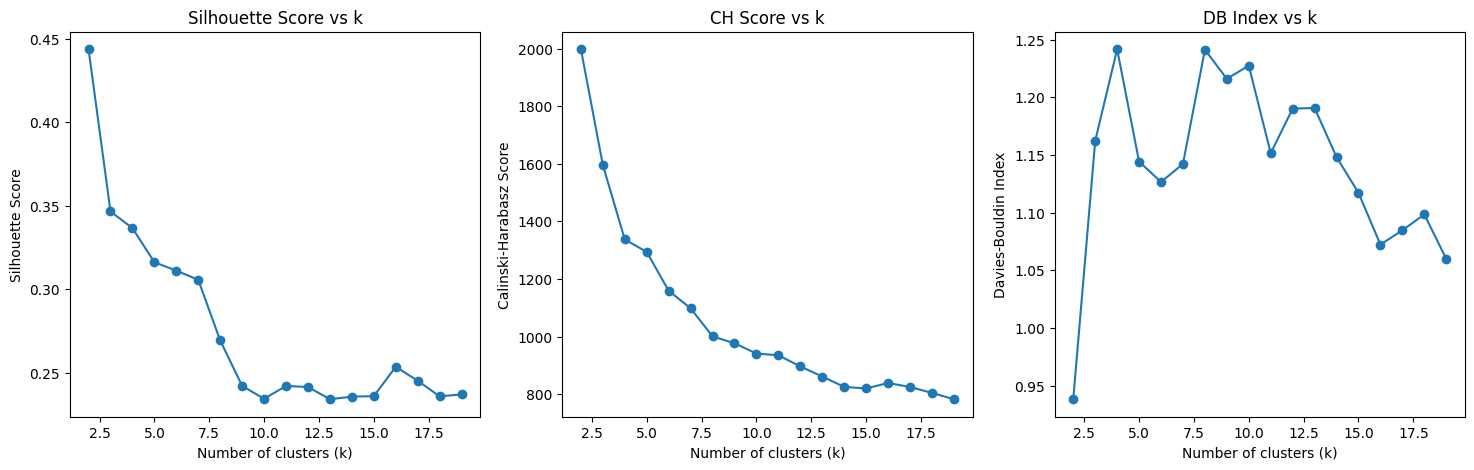

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load the dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')


# Prepare the data
X_clustering = data[['1','2','3','4','5','6']].fillna(0)

# Perform K-means for different k values and evaluate metrics
silhouette_scores = []
ch_scores = []
db_indices = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_clustering)
    silhouette_scores.append(silhouette_score(X_clustering, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_clustering, kmeans.labels_))
    db_indices.append(davies_bouldin_score(X_clustering, kmeans.labels_))

# Plot the metrics
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')

plt.subplot(1, 3, 2)
plt.plot(range(2, 20), ch_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('CH Score vs k')

plt.subplot(1, 3, 3)
plt.plot(range(2, 20), db_indices, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('DB Index vs k')

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


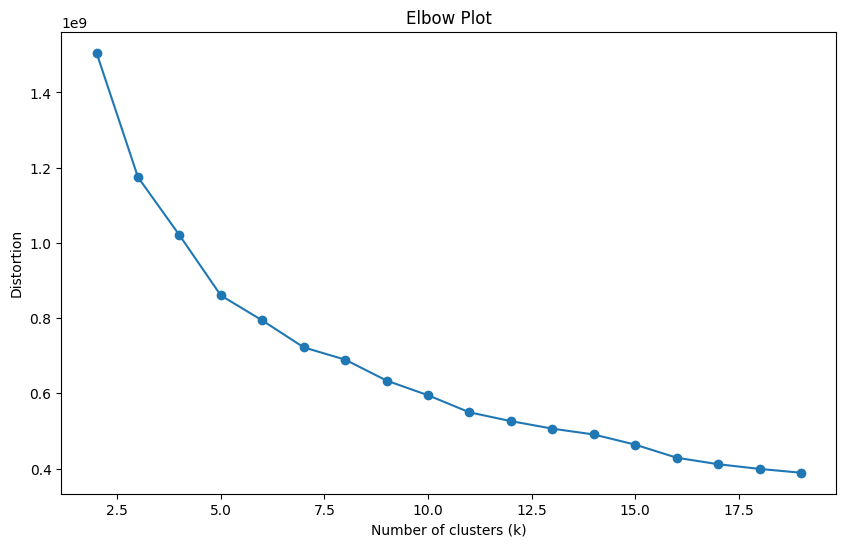

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')

# Prepare the data
X_clustering = data[['1','2','3','4','5','6']].fillna(0)

# Calculate distortions for different k values
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_clustering)
    distortions.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Plot')
plt.show()
